## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('Dataset/user_behavior_dataset.csv')

## EDA

In [11]:
df.head(15)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
5,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2
6,7,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,21,Female,4
7,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,5
8,9,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,42,Female,4
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [9]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [10]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [13]:
df.nunique()

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64

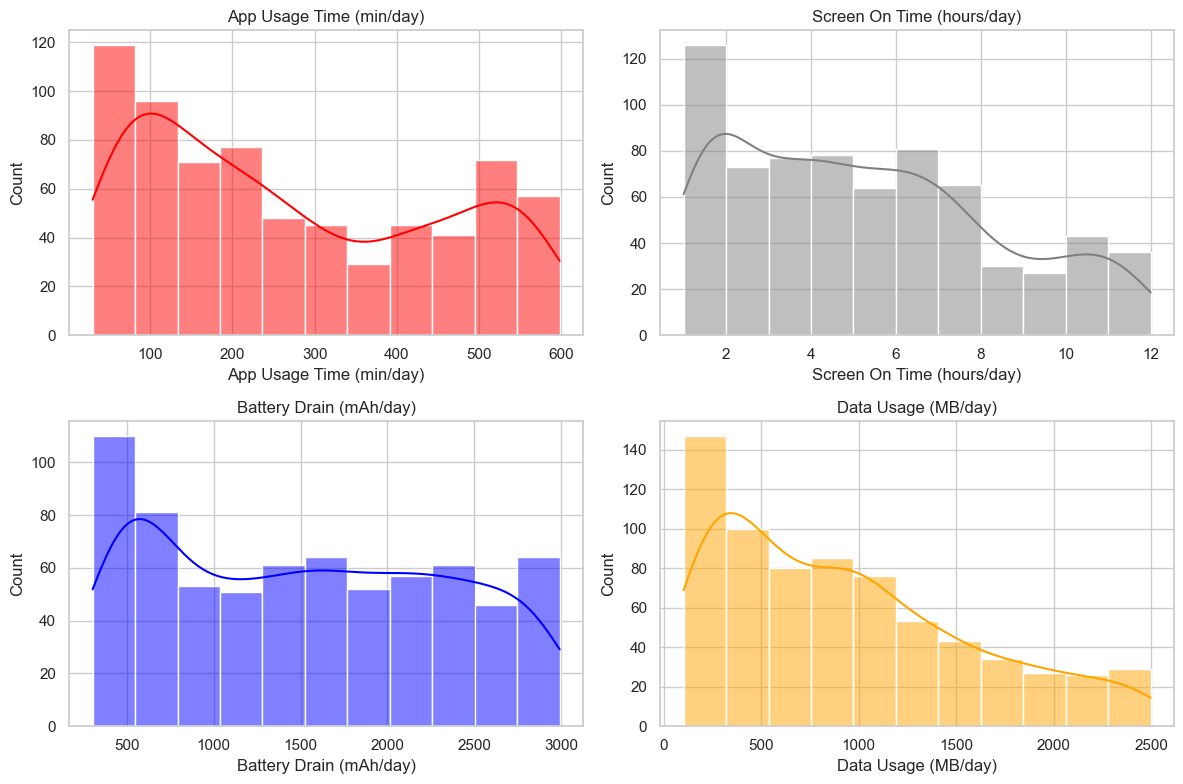

In [17]:
# Plot distribution of App Usage Time, Screen On Time, Battery Drain, and Data Usage
plt.figure(figsize=(12, 8))

# App Usage Time
plt.subplot(2, 2, 1)
sns.histplot(df['App Usage Time (min/day)'], kde=True, color='red')
plt.title('App Usage Time (min/day)')

# Screen On Time
plt.subplot(2, 2, 2)
sns.histplot(df['Screen On Time (hours/day)'], kde=True, color='grey')
plt.title('Screen On Time (hours/day)')

# Battery Drain
plt.subplot(2, 2, 3)
sns.histplot(df['Battery Drain (mAh/day)'], kde=True, color='blue')
plt.title('Battery Drain (mAh/day)')

# Data Usage
plt.subplot(2, 2, 4)
sns.histplot(df['Data Usage (MB/day)'], kde=True, color='orange')
plt.title('Data Usage (MB/day)')
plt.tight_layout()
plt.show()

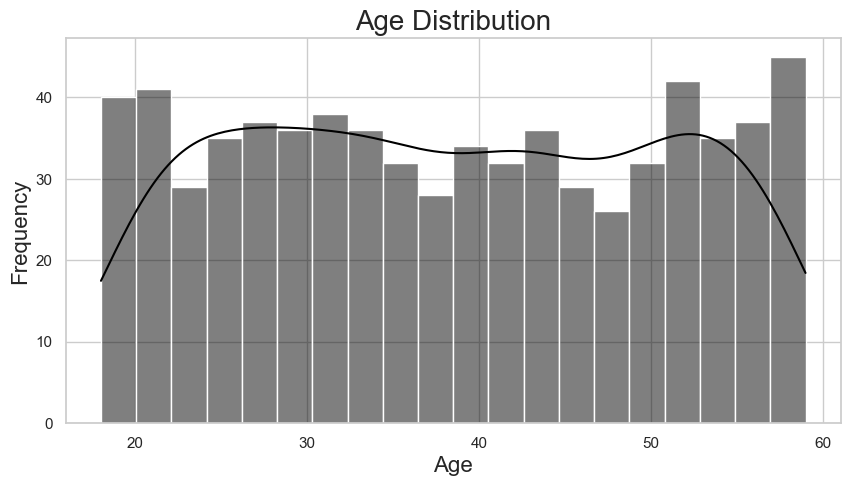

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=20, kde=True, color='black')
plt.title('Age Distribution', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

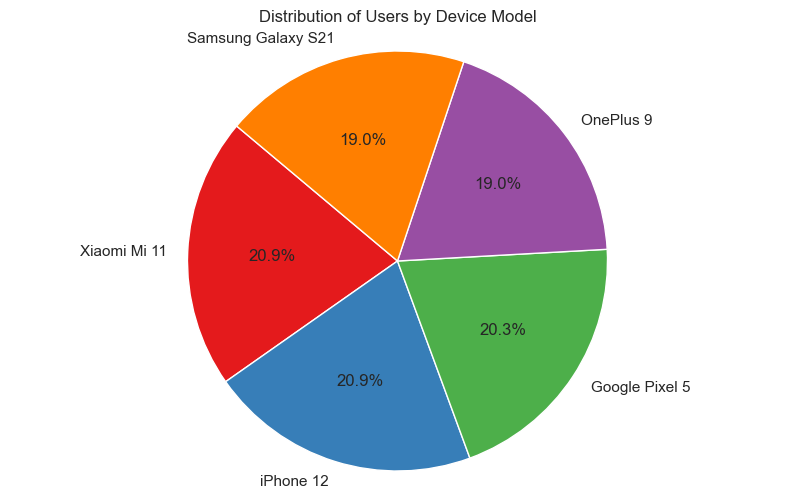

In [33]:
device_counts = df['Device Model'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1', n_colors=len(device_counts)))
plt.title('Distribution of Users by Device Model')
plt.axis('equal')
plt.show()

In [39]:
device_os_counts = df['Operating System'].value_counts()
device_os_counts

Operating System
Android    554
iOS        146
Name: count, dtype: int64

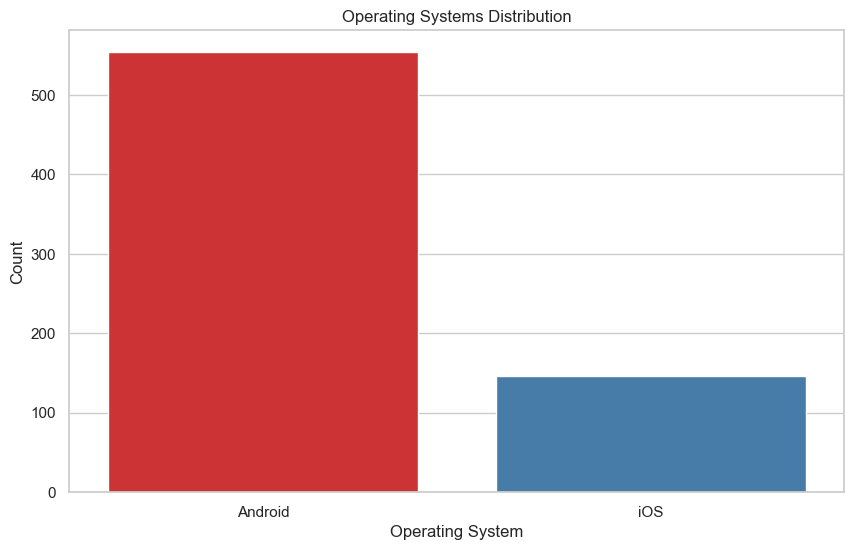

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Operating System', hue='Operating System', data=df, palette='Set1', legend=False)
plt.title('Operating Systems Distribution')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()

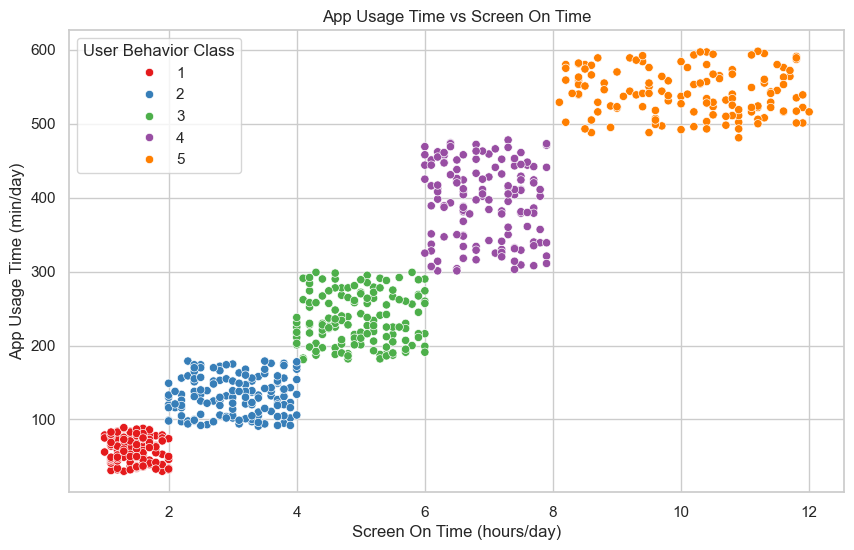

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Screen On Time (hours/day)', y='App Usage Time (min/day)', hue='User Behavior Class', palette='Set1')
plt.title('App Usage Time vs Screen On Time')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('App Usage Time (min/day)')
plt.legend(title='User Behavior Class')
plt.show()

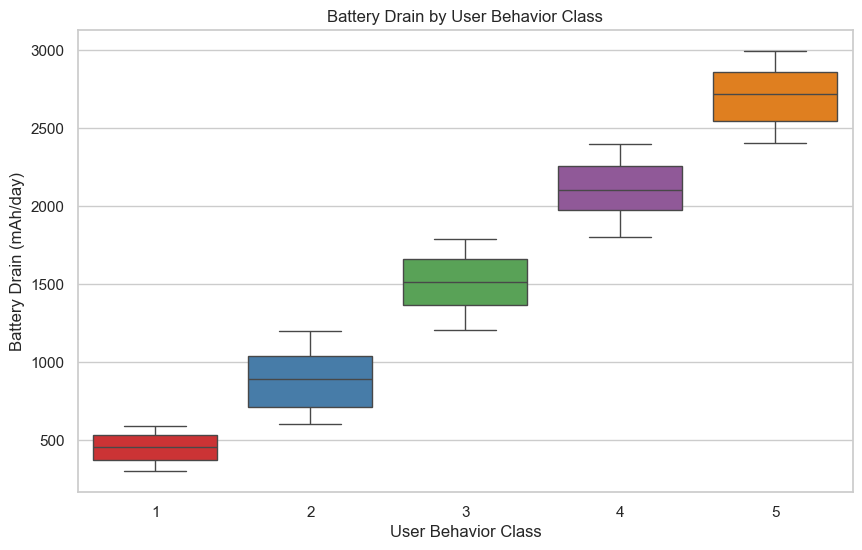

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='User Behavior Class', y='Battery Drain (mAh/day)', hue='User Behavior Class', palette='Set1', dodge=False)
plt.title('Battery Drain by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Battery Drain (mAh/day)')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

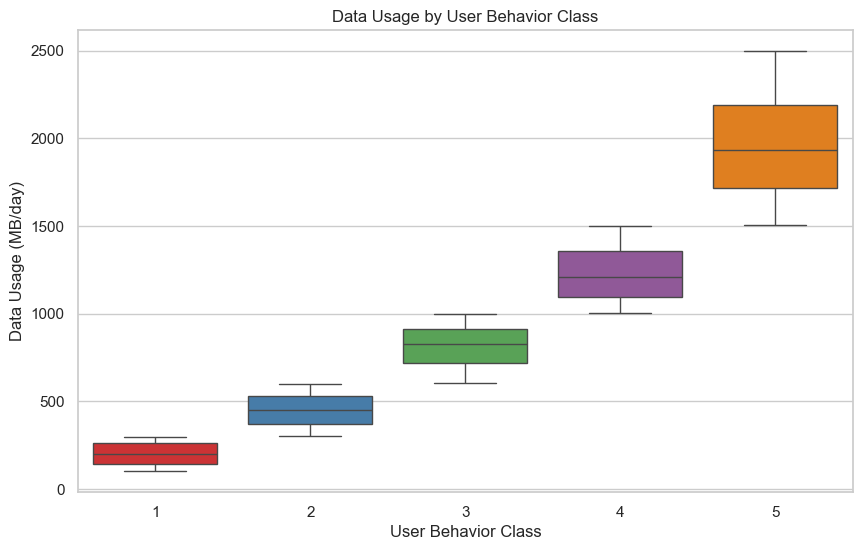

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='User Behavior Class', y='Data Usage (MB/day)', hue='User Behavior Class', data=df, palette='Set1', dodge=False)
plt.title('Data Usage by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Data Usage (MB/day)')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

<Axes: >

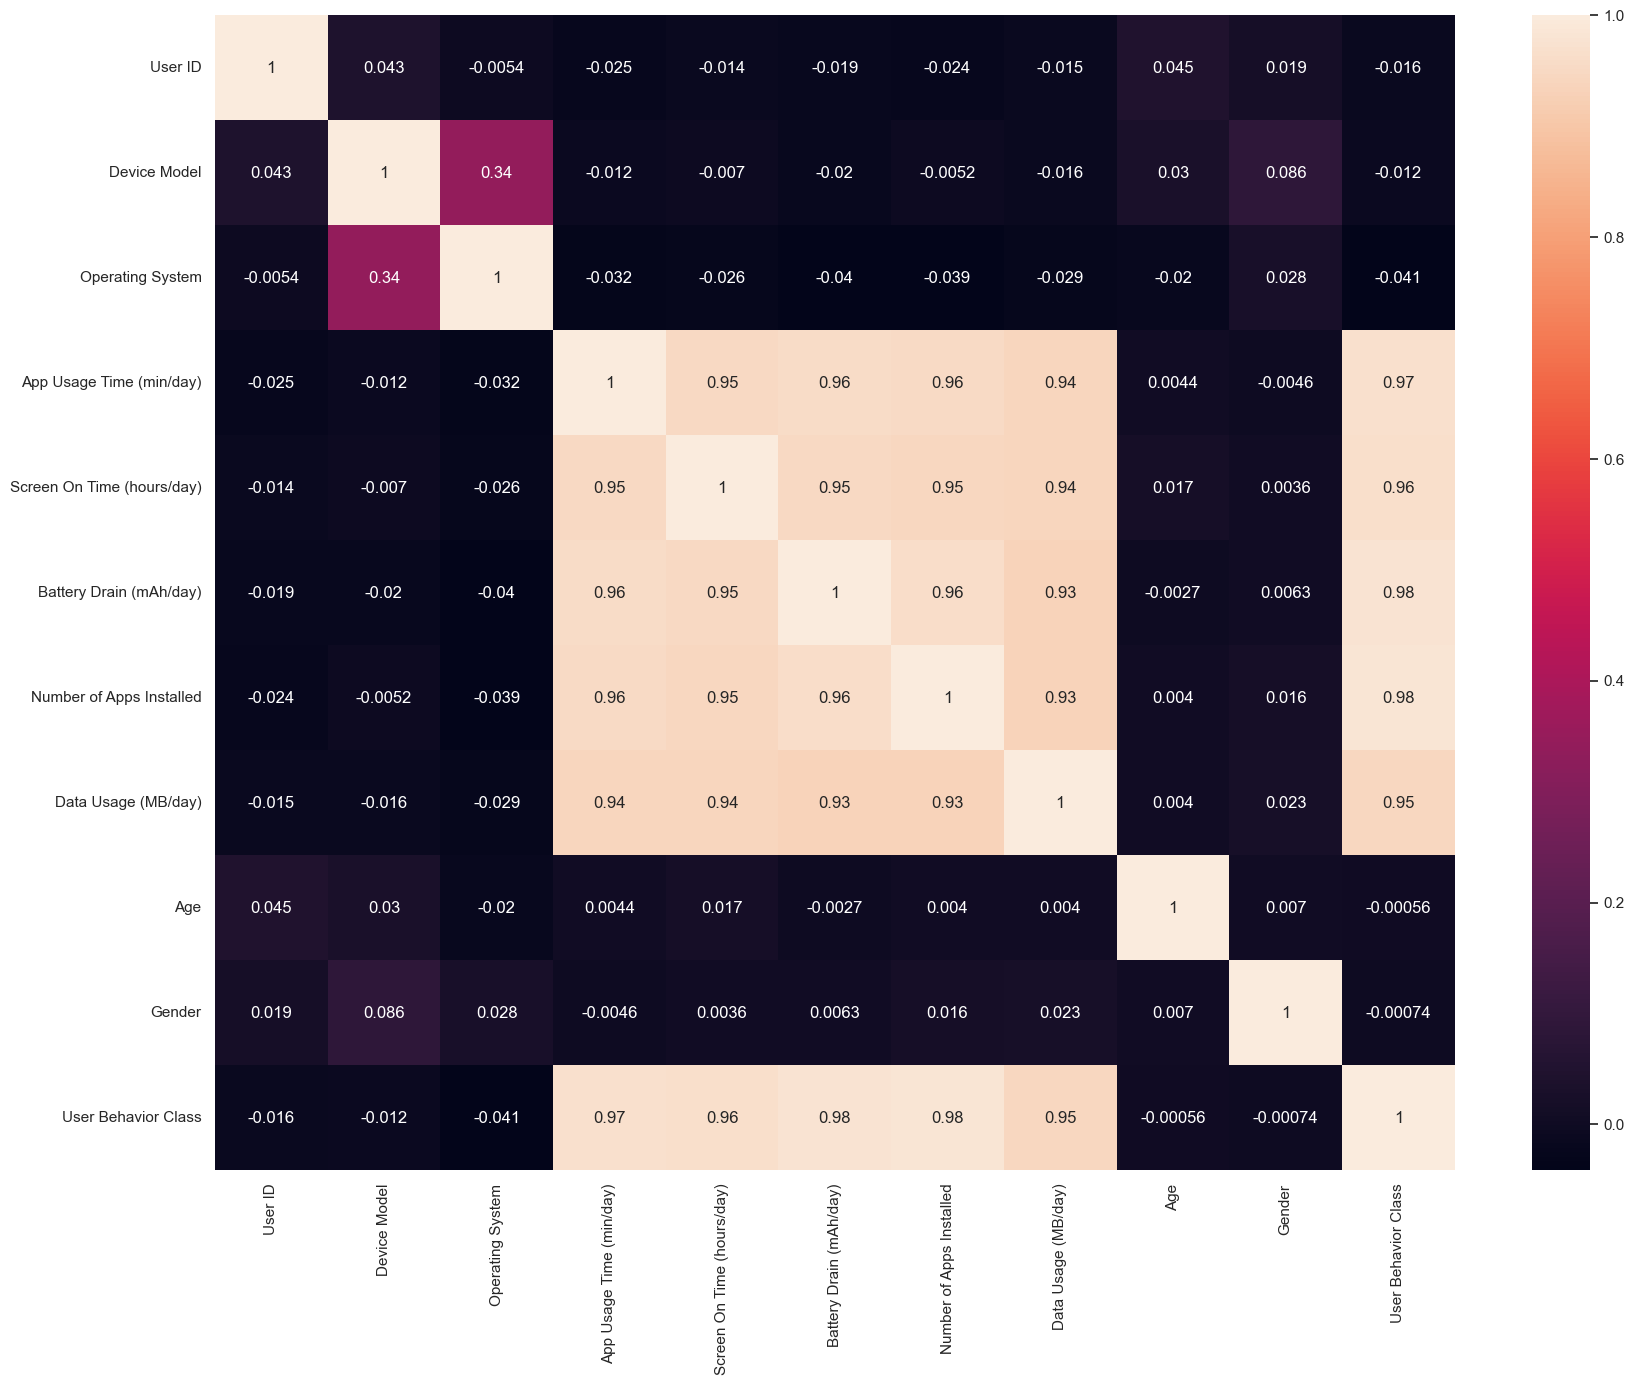

In [59]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),annot=True)

## Model Training

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Splitting

In [67]:
features = ["Number of Apps Installed", "App Usage Time (min/day)", 
            "Screen On Time (hours/day)", "Battery Drain (mAh/day)", 
            "Data Usage (MB/day)"]
target = "User Behavior Class"

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

Logistic Regression

In [83]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)


/Users/sam/Desktop/Dexter-Task/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [87]:
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.580952380952381
Confusion Matrix:
 [[23 23  0  0  0]
 [ 4 20  3  3  4]
 [ 0 12 28  6  4]
 [ 0  0 16 23  8]
 [ 0  0  0  5 28]]
Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.50      0.63        46
           2       0.36      0.59      0.45        34
           3       0.60      0.56      0.58        50
           4       0.62      0.49      0.55        47
           5       0.64      0.85      0.73        33

    accuracy                           0.58       210
   macro avg       0.61      0.60      0.59       210
weighted avg       0.63      0.58      0.59       210



Random Forest

In [95]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [92]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



KNN

In [98]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [100]:
y_pred = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9952380952380953
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  1 46  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       0.98      1.00      0.99        50
           4       1.00      0.98      0.99        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



SVM

In [96]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [97]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



## Save the Random Forest Model

In [105]:
import joblib

joblib.dump(rf_model, "random_forest_model.pkl")
print("Model saved successfully!")


Model saved successfully!
